# Introduction to Linear Algebra

## Matrices, Vectors, and Dot Products

In [ ]:
# Quick setup to load helper functions
import sys
sys.path.append('./data/')
from linalg import *

## Learning outcomes

- Understand how and why linear algebra is useful for **analyzing data**
- Learn how to think about **high-dimensional vectors** and their geometry
- Grasp the intuition and mechanics of **matrix-vector and matrix-matrix multiplication**
- Learn how to perform elementary linear algebra operations with `numpy`

**Note**: this learning unit contains mostly mathematical theory, along with practical examples for elementary linear algebra computations with `numpy`.

## What is linear algebra?

Linear algebra is the study of techniques for **manipulating and characterizing vectors**.

> An $M$-dimensional **vector** is a collection of $M$ real numbers 

$$\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_M \end{bmatrix} \in \mathbb{R}^M$$

A vector can be thought of as just a collection of real numbers. An $M$-dimensional vector $\mathbf{v}$ is thus a collection of $M$ such numbers.

Mathematically, this is often denoted by
$$\mathbf{v} \in \mathbb{R}^M$$
where the funny-looking letter $\mathbb{R}$ denotes the set of all real numbers. The notation $v_i \in \mathbb{R}$ means that the variable $v_i$ is a real number, and $\mathbf{v} \in \mathbb{R}^M$ is just shorthand for $v_1 \in \mathbb{R}, v_2 \in \mathbb{R}, \ldots, v_M \in \mathbb{R}$.

It is often useful to think of a vector as a column matrix: a matrix of real numbers with $M$ rows and 1 column, as depicted in the slide.

## Why linear algebra?

- Multivariate data can be thought of as a collection of vectors: a data set with $N$ data samples with $M$ features is just a collection of $N$ $M$-dimensional vectors! 

- Viewed in this way, **analyzing data** simply boils down to linear algebra: **manipulating and characterizing vectors**

**Example:** heights and weights of various athletes can be seen as a collection of two-dimensional vectors containing the height and weight of each athlete

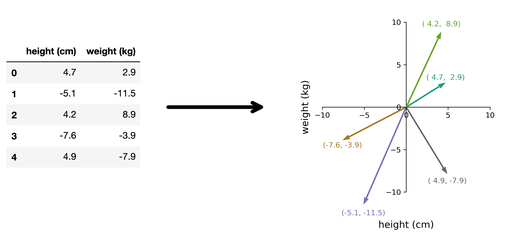

Any multivariate data set can be thought of as a collection of vectors: a data set with $N$ data points with $M$ features (quantified by real numbers) is just a collection of $N$ $M$-dimensional vectors. Analyzing such multivariate data can thus be viewed as manipulating and characterizing these vectors, for which the tools and techniques of linear algebra are extremely useful.

For example, imagine a data set containing the height and weight of $N$ different athletes. We can express the height and weight of each athlete as a 2D vector, such that the data set can be simply seen as a collection of $N$ such vectors. We can then plot these in 2D space, as shown above (N.B. in this data set, weight and height are measured relative to some baseline, so they can be positive or negative).

From just a brief look at this plot we can already tell a few things about the athletes in these data. For example, there are no vectors pointing into the upper left quadrant: there are no short and heavy athletes. Most vectors are in the upper right and lower left quadrants: most athletes are either tall and heavy or short and light.

Another more modern example of multivariate data is images. An image can be thought of as an $H \times W$ array of numbers, corresponding to the color of each pixel of an image that is $H$ pixels high and $W$ pixels wide. A data set of $N$ images is thus a collection of $H \times W$ arrays. By "flattening" these arrays into vectors, we can then treat each image as a $M$-dimensional vector, where $M=HW$. Unfortunately, $H$ and $W$ are usually pretty big, so these vectors are too high-dimensional to directly visualize like we can do with 2D vectors. It is possible, however, to use various dimensionality reduction methods to get a low-dimensional picture of how these vectors are arranged within the full $M$-dimensional space. Many of these methods exploit the tools and techniques of linear algebra.

# Characterizing vectors

## **Vector norm**

#### How "big" is a vector?

- **$L^2$ norm**: use Pythagoras theorem!
$$||\mathbf{v}||_2 = \sqrt{v_1^2 + v_2^2 + \ldots + v_M^2}$$
- **$L^1$ norm**: how many "blocks" do you have to travel? (the "Manhattan norm")
$$||\mathbf{v}||_1 = |v_1| + |v_2| + \ldots + |v_M|$$
- **$L^\infty$ norm**: largest element of the vector
$$||\mathbf{v}||_\infty = \max \{ |v_1|, |v_2|, \ldots, |v_M| \} $$

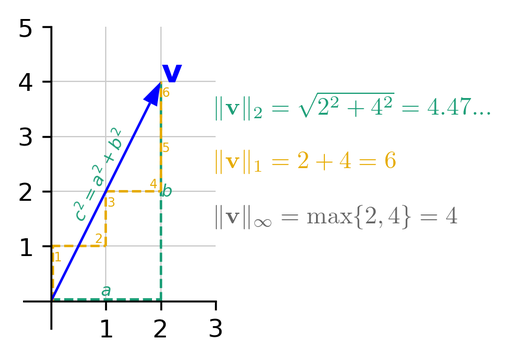

A simple property of a vector that one might want to know is how "big" it is. But it's not really obvious how to quantify this -- what does it mean for a collection of numbers to be "big"?

For example, we might say that a collection of $M$ numbers is "big" if
* when plotted as a point on $M$ axes, this point is far away from the origin
* the $M$ numbers are all far from 0 -- that is, their absolute values are large
* one of the $M$ numbers is very far from 0

While there is no single true answer to this question, linear algebra provides us with a systematic way for deriving different answers, via what is called a [**vector norm**](https://mathworld.wolfram.com/VectorNorm.html). The vector norms corresponding to each of the notions above are called
* $L^2$ norm: treating each element of the vector as a coordinate on $M$ axes, the $L^2$ norm is the distance of this point from the origin, which can be calculated using Pythagoras' theorem. Also called the "Euclidean" norm, since it arises from treating a vector as a point in Euclidean space.
* $L^1$ norm: the sum of absolute values of all the elements in the vector. Also called the "Manhattan" norm or "Taxicab" norm, since visually it correponds to counting the number of unit "blocks" you have to travel to get from the origin to the $M$-dimensional coordinate given by the vector (see figure above).
* $L^\infty$ norm: the maximum absolute value of the elements in the vector.

In machine learning, vector norms are often used to ensure that vectors of parameters don't get too "big" when being optimized. Of course, the solutions such algorithms will find will depend on what you mean by "big" -- that is, which vector norm is used. Typically, the $L^1$ or $L^2$ norms are used, or a combination thereof.

### Vector norms in `numpy`
- use `linalg.norm()` function
- pick which norm using `ord` argument

In [ ]:
v = np.random.randn(2)                     # a random 2D vector
norm_L1 = np.linalg.norm(v, ord=1)         # calculate L1 norm
norm_L2 = np.linalg.norm(v, ord=2)         # calculate L2 norm
norm_Linf = np.linalg.norm(v, ord=np.inf)  # calculate L-infinity norm

### Vector norms in `numpy`

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

# Plot it
draw_vector(v, ax=ax)

# Show norms in the title
norms = f"$L^1$ norm: {norm_L1: .2f}\n$L^2$ norm: {norm_L2: .2f}\n$L^\infty$ norm: {norm_Linf: .2f}"
ax.text(-1 * np.sign(v[0]), 0.75, norms, ha='center', va='center');
# plt.gca().set_title(norms);

In `numpy`, the norm of a vector can be calculated using the function `linalg.norm()`. This function takes an argument `ord` which specifies which norm to calculate.

The above cell uses this function to calculate the $L^1$, $L^2$ and $L^\infty$ norms of a vector. Note also the use of the `random.randn()` function to generate a random vector.

## **Vector angle**

### What is the "direction" of a vector?

- E.g. 2D vector pointing "up" = 90$^o$ angle from horizontal axis
- For higher-dimensional vectors, "up" is meaningless, but can still measure the angle between any two vectors!
- Two vectors are **orthogonal** if their angle is 90$^o$

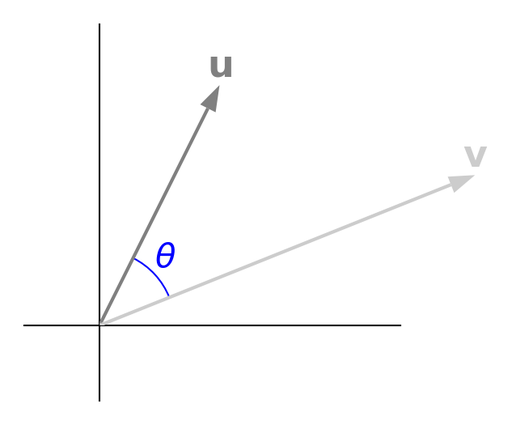

Another important vector property is the "direction" of a vector. One simple way to quantify this is as an angle. For example, a 2D vector would be said to be pointing up or down if it makes a 90$^o$ angle with the horizontal axis. It would be said to be pointing left or right if it makes a 90$^o$ angle with the vertical axis.

For 3D or higher-dimensional vectors, up/down and left/right no longer suffice to describe the direction of a vector, but its angle with any given axis -- or with any other vector -- can always be measured.

## **Vector angle**

#### What is the "direction" of a vector?

In [ ]:
# Pick two vectors
u = np.array([0.8, 1.6])
v = np.array([1, 0])

# Plot the two vectors with their angle
draw_vector_pair(u, v)

Run the above cell to see this in two dimensions. The initial setting of the vector `v` is the horizontal axis. Try changing `u` to be a vector pointing "up". You'll see that its angle from the horizontal axis is 90$^o$. Next, try changing `u` and `v` and see how the angle between them changes.

Two vectors are said to be **orthogonal** if the angle between them is 90$^o$. For example, a 2D vector pointing up is orthogonal to the horizontal axis. The same goes for a 2D vector pointing down. Try finding different values of `v` and `u` such that they are orthogonal.

## Dot product

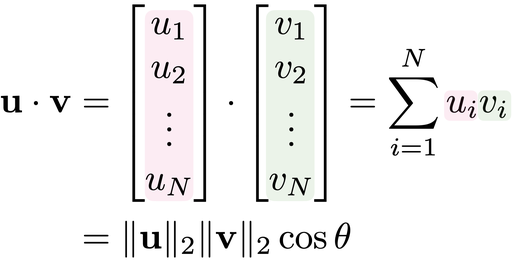

- Measures "overlap" between two vectors (see appendix)
- If $\mathbf{u}$ and $\mathbf{v}$ are orthogonal, then $\mathbf{u} \cdot \mathbf{v} = 0$

A fundamental operation in linear algebra is the **dot product** between two vectors, defined above (sometimes also called the **inner product**). The dot product between two vectors measures the extent to which they overlap.

Importantly, it depends on both the *size* and *direction* of the two vectors -- that is, their *norm* and *angle*. Specifically, it turns out that the dot product obeys the following relationship to their $L^2$ norms and the angle $\theta$ between them:
$$
\mathbf{u} \cdot \mathbf{v} = \|\mathbf{u}\|_2\|\mathbf{v}\|_2 \cos\theta
$$
See the appendix for a simple proof of this fact, which also provides a little more intuition for how the dot product measures the overlap between two vectors.

An important fact about the dot product is that it equals 0 whenever two vectors are orthogonal: if $\theta = \pm 90^o$, then $\cos\theta = 0$!

## Dot product

In [ ]:
# Pick two vectors
u = np.array([0.8, 1.6])
v = np.array([2.5, 1])

In [ ]:
dotprod = np.dot(u, v)  # np.dot() computes dot product

In [ ]:
# Plot the two vectors with their angle
draw_vector_pair(u, v)

# Calculate their dot product
dotprod = np.dot(u, v)  # np.dot() computes dot product
plt.gca().set_title(f"dot product: {dotprod: .2f}");

In `numpy`, the dot product can be calculated with the function `np.dot()`. Try playing around with `u` and `v` in the above cell to see how the dot product changes with changes in the vectors. Check out what happens to the dot product when the vectors are made bigger or smaller, and what happens when their directions change.

## **Cosine similarity**

#### How "similar" are two vectors?

$$ \cos\theta = \frac{\mathbf{u} \cdot \mathbf{v}}{||\mathbf{u}||_2||\mathbf{v}||_2} $$

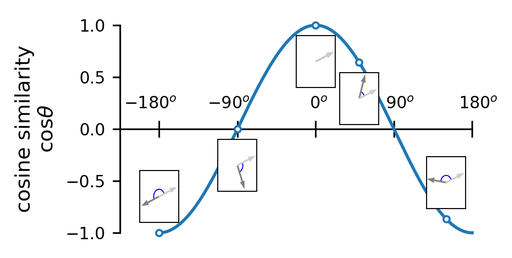

Another vector property one might be interested in is in how similar one vector is to another. One simple way is to measure the angle between the two vectors and then say that they are similar if they point in the same direction, or different if they don't.

We quantify the degree to which two vectors point in the same direction via the cosine of the angle between them, called their **cosine similarity**. The cosine is a nice function to use for this because its largest output (+1) corresponds to an angle of 0$^o$ -- i.e. that of two vectors pointing in exactly the same direction -- and its smallest output (-1) corresponds to an angle of 180$^o$ -- i.e. that of two vectors pointing in exactly opposite directions.

Importantly, the cosine similarity can be calculated very easily via the dot product.

Note that cosine similarity is not the only way to measure the similarity between two vectors. For example, two vectors with very different $L^2$ norms may point in the same direction and thus have high cosine similarity, even if their coordinates in space are very far from each other. The cosine similarity is just one way of measuring the similarity between two vectors, but one that is used often in machine learning.

### Cosine similarity in `numpy`

In [ ]:
# Pick two vectors
u = np.array([0.8, 1.6])
v = np.array([2.5, 1])

In [ ]:
# Calculate dot product
dotprod = np.dot(u, v)

# Calculate cosine similarity
cossim = np.dot(u, v) / (np.linalg.norm(u, ord=2) * np.linalg.norm(v, ord=2))

We can compute the cosine similarity in `numpy` using the `np.linalg.norm()` and `np.dot()` functions covered above.

### Cosine similarity in `numpy`

In [ ]:
# Plot the two vectors with their angle
draw_vector_pair(u, v)

# Put dot product and cosine similarity in the title
dotprod_str = f"dot product: {dotprod: .2f}"
cossim_str = f"cosine similarity: {cossim: .2f}"
plt.gca().set_title(dotprod_str + '\n' + cossim_str);


# Manipulating vectors

### **Scalar multiplication**

$$\mathbf{u} = a\mathbf{v}$$
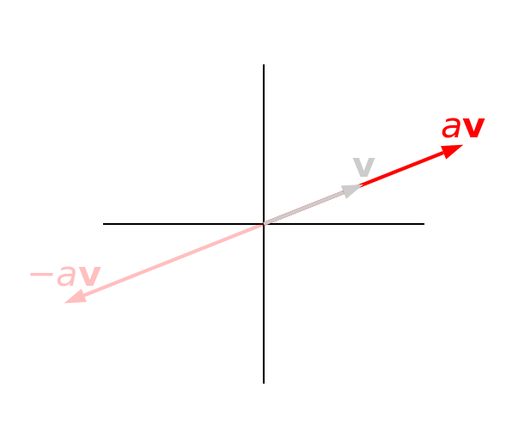

### **Vector addition** 

$$\mathbf{u} = \mathbf{v} + \mathbf{w}$$
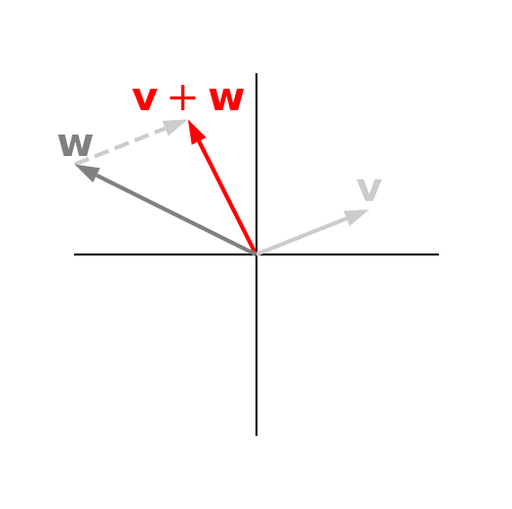

### **Linear combination**

$$\mathbf{u} = a\mathbf{v} + b\mathbf{w}$$
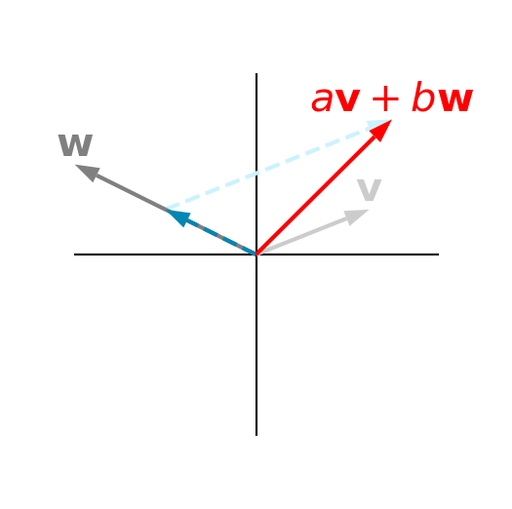

The two elementary operations we can perform with vectors are
- *scalar multiplication*: makes the vector longer or shorter, and can flip its direction if the scalar is negative negative
- *vector addition*: combine two vectors by appending one to the end of the other

Putting these two together, we get *linear combinations*.

## Linear independence

A set of vectors are **linearly independent** if none of them can be produced from linear combinations of the others

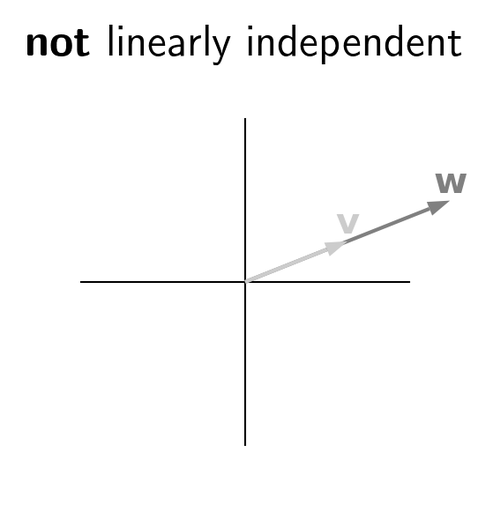

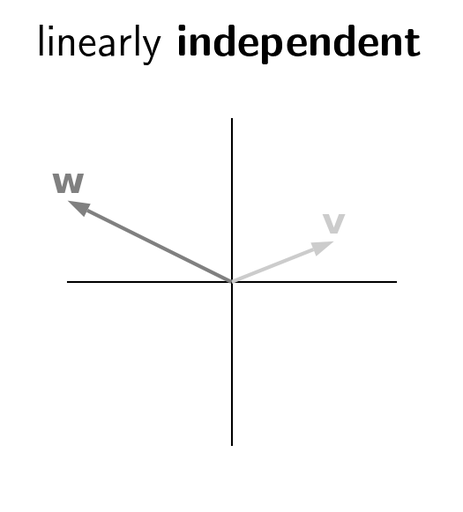

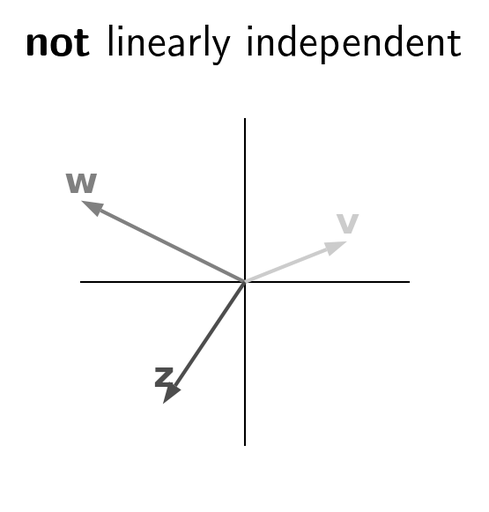

The vector $\mathbf{u} = a\mathbf{v}$ is a linear combination of $\mathbf{v}$ with no other vector. Thus, the pair of vectors $\{\mathbf{v}, \mathbf{u}\}$ are not linearly independent. 

The pair $\{\mathbf{v}, \mathbf{w}\}$, on the other hand, clearly are: you can't get one from the other by rescaling it.

The trio of vectors $\{\mathbf{v}, \mathbf{w}, \mathbf{z}\}$, however, are not linearly independent: if you think about it long enough, you'll see that you can construct $\mathbf{z}$ from a linear combination of $\mathbf{v}$ and $\mathbf{w}$, or $\mathbf{v}$ from a linear combination of $\mathbf{z}$ and $\mathbf{w}$, ...

## Linear independence

If $\mathbf{u}$ and $\mathbf{v}$ are linearly independent then any 2D vector can be formed by a linear combination of $\mathbf{u}$ and $\mathbf{v}$!

- In $M$ dimensions, up to $M$ vectors can be linearly independent.
- $M$ linearly independent $M$-dimensional vectors form a **complete basis**: any $M$-dimensional vector can be produced by a linear combination of these vectors

In [ ]:
ax = plt.gca()

# Basis vector 1
w = np.array([-8, 4])
draw_vector(w, color="0.5", label='w', ax=ax)

# Basis vector 2
v = np.array([5, 2])
draw_vector(v, color="0.8", label='v', ax=ax)

# Linear combination
u = 0.5 * w + 2 * v
draw_vector(u, color='r', ax=ax)

Run the above cell to plot a pair of vectors and a linear combination of them. 

First, use the given settings of `v` and `w` and play around with plotting various linear combinations of them. Challenge yourself to picking a random vector and then finding a linear combination of `v` and `w` that matches that vector. You'll find that you can always find such a linear combination, since the given `v` and `w` are linearly independent and thus form a complete basis.

Note that this also implies that it is not possible to find a third vector that is linearly independent of `v` and `w`: only up to two 2D vectors can be linearly independent of each other.

Now try setting 
```
v = a * w
```
for some scalar `a`. In this case, `v` is a scalar multiple of `w` and therefore `v` and `w` are no longer linearly independent. Try repeating the above exercise again: you'll see that now it is not possible to build any vector from a linear combination of `v` and `w`.

# Matrices

## What is a matrix?
An $M \times N$ array of numbers

$$\mathbf{A} = \begin{bmatrix} A_{11} & A_{12} & \ldots & A_{1N} \\ A_{21} & A_{22} & \ldots & A_{2N} \\ \vdots & \vdots & \vdots & \vdots \\ A_{M1} & A_{M2} & \ldots & A_{MN} \end{bmatrix}$$

- $M$ is the number of rows, $N$ is the number of columns
- $A_{ij}$ is the element of the matrix $\mathbf{A}$ in the $i$th row and $j$th column
- If $M = N$, it is called a **square** matrix, and has some special properties

While a vector is just a simple collection or list of real numbers, a matrix is a structured array of real numbers, in which its elements are arranged in rows and columns. A matrix $\mathbf{A}$ with $M$ rows and $N$ columns is said to be of shape $M \times N$, sometimes notated as $\mathbf{A} \in \mathbb{R}^{M \times N}$.

The element of $\mathbf{A}$ in the $i$th row and $j$th column is typically notated by $A_{ij}$ or $a_{ij}$. 

If $M = N$ -- that is, the matrix has the same number of rows and colums -- the matrix is said to be square. Square matrices have some special properties that we'll touch on below. If $M \neq N$, the matrix is rectangular. Rectangular matrices are often referred to as "skinny" or "fat", depending on whether they have more rows than columns ("skinny", $M > N$) or more columns than rows ("fat", $N > M$).

## Matrix transpose

The **transpose** of an $N \times M$ matrix is obtained by swapping its rows/columns, yielding an $M \times N$ matrix:

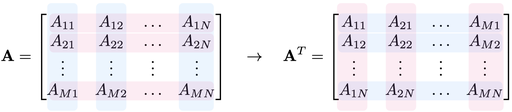

In `numpy`:

In [ ]:
A = np.arange(12).reshape(3, 4)

In [ ]:
print('original matrix:\n', A)
print('matrix transpose:\n', A.T)

An elementary matrix operation is the matrix *transpose*, whereby the rows and columns of the matrix are flipped. One way of notating this in terms of the elements of each matrix is as follows:
$$(A^T)_{ij} = A_{ji}$$
In other words, the element in the $i$th row and $j$th column of the transpose is the element in the $j$th row and $i$th column of the transposed matrix.

In `numpy`, a matrix can be transposed simply using the `.T` attribute: `A.T` is the transpose of the matrix `A`.

## Matrix-vector multiplication

Multiplying a matrix with a vector results in another vector:
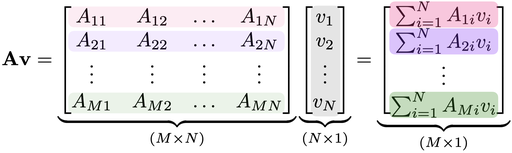

- **matrix-vector multiplication is not always allowed!** $\mathbf{A}$ and $\mathbf{v}$ can only be multiplied if $\mathbf{v}$ has as many components as $\mathbf{A}$ has columns

In [ ]:
n = 10
m = 4

A = np.random.randn(m, n)  # random m x n matrix
v = np.random.randn(n)     # random n-dimensional vector

In [ ]:
Av = np.dot(A, v)          # can use np.dot() for matrix-vector multiplication
print(A.shape, "*", v.shape, "=", Av.shape)

Multiplying a matrix with a vector yields another vector. Let $\mathbf{A}$ be an $M \times N$ matrix and $\mathbf{v} \in \mathbb{R}^N$ be an $N$-dimensional vector. Then the components of matrix-vector product $\mathbf{u} = \mathbf{Av}$ are given by the following equation:
$$u_i = \sum_{j=1}^N A_{ij} v_j$$
This is a bit of a mouthful at the moment, but in the next few slides we'll get some intuition for what this equation really means.

Note that this equation only makes sense if $\mathbf{A}$ has $N$ columns and $\mathbf{v}$ has $N$ elements: a matrix $\mathbf{A}$ and vector $\mathbf{v}$ can only be multiplied if the matrix $\mathbf{A}$ has the same number of columns as the vector $\mathbf{v}$ has elements.

When performing matrix-vector multiplication, it is important to keep in mind that the vector $\mathbf{Av}$ that results from this operation may not be the same dimensionality as the vector $\mathbf{v}$ being multiplied with the matrix. They will only have the same dimensionality if the matrix $\mathbf{A}$ is square.

#### Interpretation #1:

### matrices as **columns**

- compute linear combination of matrix columns
- can think of $\mathbf{v}$ as "weights" weighting each column in the combination

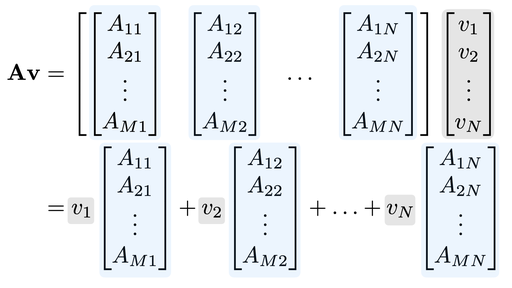

In [ ]:
A = np.arange(12).reshape(3, 4)
v = np.arange(A.shape[1])

In [ ]:
Av = np.dot(A, v)  # matrix-vector multiplication with np.dot()

m, n = A.shape

Av_cols = np.zeros(m)

for i, vi in enumerate(v):
    Av_cols += vi * A[:, i]   # linearly combine columns

print('using dot: ', Av)
print('using linear combination of columns: ', Av_cols)

One way to interpret matrix-vector multiplication is to think about the matrix as a collection of columns. Multiplying a matrix $\mathbf{A}$ with a vector $\mathbf{v}$ then comes down to taking a linear combination of the columns of $\mathbf{A}$, where the scalars multiplying each column are given by the respective components of $\mathbf{v}$:
$$ \mathbf{Av} =  \sum_{i=1}^N v_i \mathbf{a}^{(i)} $$
where $\mathbf{a}^{(i)}$ denotes the $i$th column of $\mathbf{A}$,
$$ \mathbf{a}^{(i)} = \begin{bmatrix} A_{1i} \\ A_{2i} \\ \vdots \\ A_{Mi} \end{bmatrix} $$
It is easy to check that this definition agrees with the one provided above.

Note that the columns of $\mathbf{A}$ can be vectors of any dimensionality. Thus, the matrix-vector product $\mathbf{Av}$ won't necessarily be a vector in the same space as $\mathbf{v}$:
- If $\mathbf{A}$ is square ($M = N$), then $\mathbf{Av}$ is the same dimensionality as $\mathbf{v}$
- If $\mathbf{A}$ is skinny ($M > N$), then $\mathbf{Av}$ is higher-dimensional than $\mathbf{v}$
- If $\mathbf{A}$ is fat ($M < N$), then $\mathbf{Av}$ is lower-dimensional than $\mathbf{v}$

#### Interpretation #2:

### matrices as **rows**

- compute dot products between the vector and each row of the matrix
- can think of $\mathbf{v}$ as a "template" that each row gets compared to

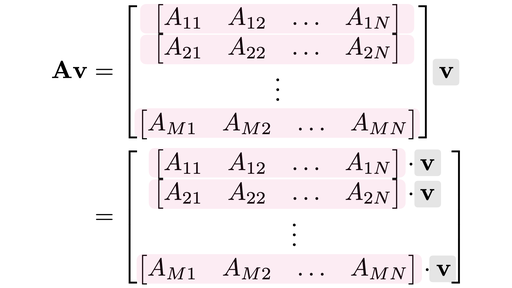

In [ ]:
A = np.arange(12).reshape(3, 4)
v = np.arange(A.shape[1])

In [ ]:
Av = np.dot(A, v)   # matrix-vector multiplication with np.dot()

m, n = A.shape

Av_rows = np.zeros(m)

for i in range(m):
    Av_rows[i] = np.dot(v, A[i, :])  # dot products with each row

print('using dot: ', Av)
print('using dot products with rows: ', Av_rows)

Another way to interpret matrix-vector multiplication is to think about the matrix as a collection of rows. Multiplying a matrix $\mathbf{A}$ with a vector $\mathbf{v}$ then comes down to computing dot products between each row and $\mathbf{v}$:
$$ \mathbf{Av} =  \begin{bmatrix} \mathbf{a}^{(1)} \cdot \mathbf{v} \\ \mathbf{a}^{(2)} \cdot \mathbf{v} \\ \vdots \\ \mathbf{a}^{(M)} \cdot \mathbf{v} \end{bmatrix} $$
where $\mathbf{a}^{(i)}$ denotes the $i$th row of $\mathbf{A}$,
$$ \mathbf{a}^{(i)} = \begin{bmatrix} A_{i1} \\ A_{i2} \\ \vdots \\ A_{iN} \end{bmatrix} $$
It is easy to check that this definition agrees with the ones mentioned above.

Recall that the dot product between two vectors is proportional to their cosine similarity. We can thus roughly think of matrix-vector multiplication as computing the similarity of the vector with each row of the matrix.

### Rows and columns in data: the **design matrix**

Let's try to predict athletes' running speed using the simple equation
$$ \text{speed} = \text{height} - \text{weight} $$

This can be calculated via matrix-vector multiplication!

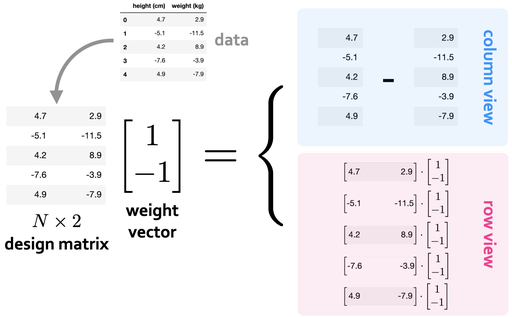


Let's go back to our example data set of (relative) heights and weights of various athletes. One simple thing we might want to do with these data is to use them to predict each athlete's running speed -- an unknown quantity that track team scouts might want to know.

Having observed that heavier athletes tend to be slower and taller athletes tend to be faster, a simple way to predict running speed might be to calculate the difference between height and weight,
$$ \text{predicted speed} = \text{height} - \text{weight} $$

This **linear** function of the data can be efficiently calculated using matrix-vector multiplication. We first formalize our data set as an $N \times 2$ matrix 
$$ \mathbf{X} = \begin{bmatrix} X_{11} & X_{12} \\ X_{21} & X_{22} \\ \vdots & \vdots \\ X_{N1} & X_{N2} \end{bmatrix} $$
where
* the first column $X_{11}, X_{21}, \ldots, X_{N1}$ contains the heights of each of the $N$ athletes
* the second column $X_{12}, X_{22}, \ldots, X_{N2}$ contains the weights of each of the $N$ athletes

This matrix of data is called the **design matrix**, containing one row for each data point.

Defining the **weight vector**
$$ \mathbf{w} = \begin{bmatrix} -1 \\ 1 \end{bmatrix} $$
we can calculate the predicted speed for each athlete by multiplying the design matrix with this weight vector
$$ \mathbf{Xw} = \begin{bmatrix} X_{11} - X_{12} \\ X_{21} - X_{22} \\ \vdots \\ X_{N1} - X_{N2} \end{bmatrix} = \begin{bmatrix} \text{height of athlete } 1 -  \text{weight of athlete } 1 \\ \text{height of athlete } 2 -  \text{weight of athlete } 2 \\ \vdots \\ \text{height of athlete } N -  \text{weight of athlete } N \end{bmatrix} $$

As illustrated in the slide, we can accordingly interpret this matrix-vector multiplication in terms of the columns or rows of the design matrix:
1. **Column** view: predicted running speed of all athletes = difference between weight and height **columns**
2. **Row** view: predicted running speed of athlete $i$ = dot product between $i$th **row** and the relative weight and height vector of the ideal "template" athlete, $\begin{bmatrix} -1 \\ 1 \end{bmatrix}$

### The design matrix with `pandas` and `numpy`

In [ ]:
data = get_data()  # load pandas DataFrame with data
data.head()

In [ ]:
design_matrix = data.to_numpy()  # get design matrix as a numpy array

n, m = design_matrix.shape
print(n, 'data points with', m, 'features')

weights = np.array([1, -1])  # weight vector

speed = np.dot(design_matrix, weights)  # matrix-vector multiplication
print('predicted speeds:', speed)

Data in `pandas` if often stored in a `DataFrame`. These objects are like tables of data, with rows and columns indexed by row labels and column headers. The design matrix, on the other hand, is just a matrix: no row labels and no column headers, just an array of numbers.

To turn a `pandas.DataFrame` object into a simple `numpy` matrix, we can use the `.to_numpy()` method. We can then use the `np.dot()` function to multiply this with a vector of weights to make our speed predictions as outlined in the previous slide.

#### Interpretation #3 [for **square** matrices only!]:
### matrices as **transformations** 

An $M \times M$ **square** matrix transforms an $M$-dimensional vector into another one

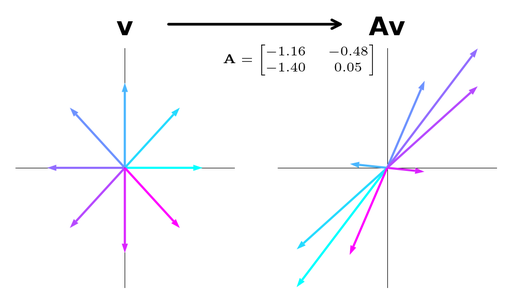

We can think about an $M \times M$ square matrix as a vector transformation, whereby its multiplying an $M$-dimensional vector with it results in a new $M$-dimensional vector:
$$ \mathbf{v} \rightarrow \mathbf{Av} $$

#### Special square matrices:
## Rotation matrix

A rotation matrix rotates vectors by a given angle

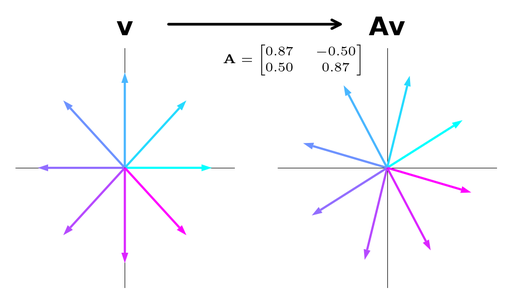

In two dimensions (i.e. $M=2$), a rotation matrix $\mathbf{R}(\theta)$ that rotates vectors by $\theta^o$ has the following form:
$$ \mathbf{R}(\theta) = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} $$
It is more difficult to write down similar equations for rotation matrices in higher dimensions, where rotations can occur in many different planes.

However, all rotation matrices are **orthonormal**: their columns are all orthogonal to each other and they are unit norm (i.e. have $L^2$ norm of 1.0). Note that, because their columns are all orthogonal to each other, they are also linearly independent, so all orthonormal matrices are full rank.

#### Special square matrices:
## Identity matrix

The simplest possible transformation: transforming $\mathbf{v}$ into itself, i.e. $\mathbf{Av} = \mathbf{v}$.

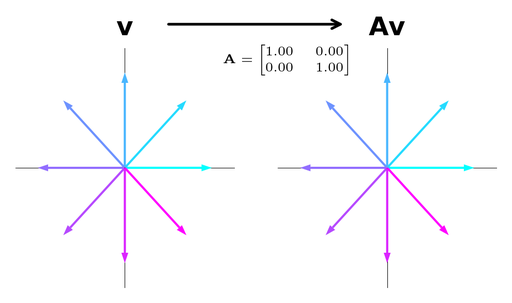

The identity matrix is notated by $\mathbf{I}$ and looks like this: $ \mathbf{I} = \begin{bmatrix} 1 & 0 & \ldots & 0 \\ 0 & 1 & \ldots & 0 \\ \vdots & \vdots & \ddots & 0 \\ 0 & 0 & \ldots & 1 \end{bmatrix}$

The identity matrix $\mathbf{I}$ transforms a vector into itself:
$$ \mathbf{Iv} = \mathbf{v} $$
The identity matrix consists of 1's on the diagonal and 0's off the diagonal, as illustrated in the slide.

## Matrix-matrix multiplication

Multiplying a $M \times N$ matrix with a $N \times P$ matrix results in a $M \times P$ matrix:
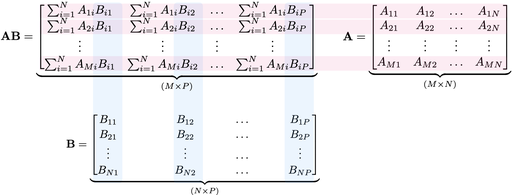

- **Matrix-matrix multiplication is not always allowed!** $\mathbf{A}$ and $\mathbf{B}$ can only be multiplied if $\mathbf{A}$ has as many columns as $\mathbf{B}$ has rows.
- **Matrix-matrix multiplication depends on order!** Except in special cases, $\mathbf{AB} \neq \mathbf{BA}$.

In [ ]:
n = 10
m = 4
p = 6

A = np.random.randn(m, n)  # random m x n matrix
B = np.random.randn(n, p)  # random n x p matrix

In [ ]:
AB = np.dot(A, B)          # can use np.dot() for matrix-matrix multiplication too!
print(A.shape, "*", B.shape, "=", AB.shape)

Multiplying two matrices together results in another matrix, with the same number of rows as the first matrix in the multiplication, and the same number of columns as the second matrix in the multiplication. 

Note that two matrices can only be multiplied if their "inner" dimensions agree: the first matrix in the multiplication must have the same number of columns as the second matrix has rows. In other words an $M \times N$ matrix with $N$ columns can only be multiplied with a $N \times P$ matrix, i.e. one with $N$ rows.

Another important aspect of matrix-matrix multiplication is that, unlike when multiplying two numbers, when multiplying two matrices the order matters. The product $\mathbf{AB}$ is not equal to the product $\mathbf{BA}$ (except in very special cases). A simple example of this is when $\mathbf{A}$ is $M \times N$ and $\mathbf{B}$ is $N \times P$: since $\mathbf{A}$ has as many columns has $\mathbf{B}$ has rows, $\mathbf{AB}$ is a valid multiplication; but if $M \neq P$, then $\mathbf{BA}$ is not a valid multiplication!

The components of the product $\mathbf{C} = \mathbf{AB}$ are given by the following equation:
$$ C_{ij} = \sum_{k=1}^N A_{ik} B_{kj} $$
This is a complicated equation, so we'll now turn to the column-wise and row-wise views of matrices to get a grasp of what this really means.

#### Interpretation #1:

### matrix-matrix multiplication as **matrix-vector multiplication**

Can apply all the same concepts from matrix-vector multiplication to matrix-matrix multiplication!

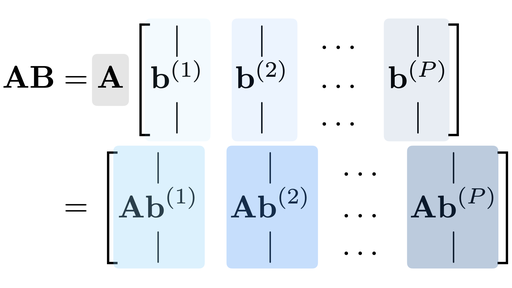

In [ ]:
A = np.arange(8).reshape(2, 4)
B = np.arange(12).reshape(4, 3)

In [ ]:
AB = np.dot(A, B)   # matrix-matrix multiplication with np.dot()

m, n = A.shape
n, p = B.shape

AB_cols = np.zeros((m, p))

for i in range(p):
    AB_cols[:, i] = np.dot(A, B[:, i])  # multiply A with each column of B

print('using dot:\n', AB)
print('using matrix-vector products:\n', AB_cols)

The easiest way to think about matrix-matrix multiplication is in terms of matrix-vector multiplication, in which case you can again apply all the same intuitions discussed above! Treating the second matrix $\mathbf{B}$ as a collection of columns $\mathbf{b}^{(1)}, \mathbf{b}^{(2)}, \ldots, \mathbf{b}^{(P)}$, the $i$th column of the product $\mathbf{AB}$ is equal to the matrix-vector product $\mathbf{Ab}^{(i)}$.

#### Interpretation #2:

### matrix-matrix multiplication as **dot products**

$\mathbf{AB}$ measures overlap between rows of $\mathbf{A}$ and columns of $\mathbf{B}$

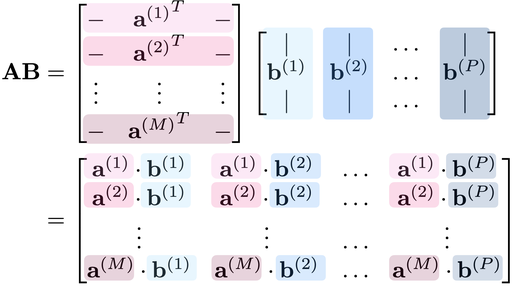

In [ ]:
A = np.arange(8).reshape(2, 4)
B = np.arange(12).reshape(4, 3)

In [ ]:
AB = np.dot(A, B)   # matrix-matrix multiplication with np.dot()

m, n = A.shape
n, p = B.shape

AB_dots = np.zeros((m, p))

for i in range(m):  # loop over rows of A
    for j in range(p):  # loop over columns of B
        AB_dots[i, j] = np.dot(A[i, :], B[:, j])  # dot product

print('using dot:\n', AB)
print('using row-column dot products:\n', AB_dots)

Another way to think about matrix-matrix multiplication is in terms of dot products between the rows of the first matrix $\mathbf{A}$ and the columns of the second matrix $\mathbf{B}$. Just like we discussed for matrix-vector multilpication, we can think of these dot products as roughly measuring the similarity between the rows of $\mathbf{A}$ and the columns of $\mathbf{B}$. The $i$th column of the product $\mathbf{AB}$ roughly measures the similarity between each row of $\mathbf{A}$ and the $i$th column of $\mathbf{B}$; the $i$th row of $\mathbf{AB}$ roughly measures the similarity between each column of $\mathbf{B}$ and the $i$th row of $\mathbf{A}$.

## Summary

#### Vectors
- a **vector** is a collection of real numbers, just like a **data point**!
- the size of a vector can be measured with a **vector norm**
- the similarity between two vectors can be measured with the **cosine similarity**, calculated with the **dot product**

#### Matrices
- a **matrix** is an array of numbers, just like a **data set**!
- the **design matrix** contains a data point in each of its rows
- matrix-vector and matrix-matrix multiplication can be interpreted in terms of matrix **rows** and **columns**

# Appendix

## The dot product and cosine similarity

To get a little more intuition for what the dot product means, here we derive its relationship to cosine similarity.

Consider two vectors $\mathbf{u}$ and $\mathbf{v}$, that point in two directions at an angle $\theta$. The **scalar projection** of $\mathbf{v}$ onto $\mathbf{u}$ is the vector pointing in the same direction as $\mathbf{u}$ that is closest to $\mathbf{v}$. This is illustrated in the diagram below, where the scalar projection is denoted by $\mathbf{p}$. The scalar projection can be thought of as the "shadow" that $\mathbf{v}$ casts onto $\mathbf{u}$ under a light shining behind $\mathbf{v}$, from a direction orthogonal to $\mathbf{u}$ (i.e. in the direction of the dotted red line).

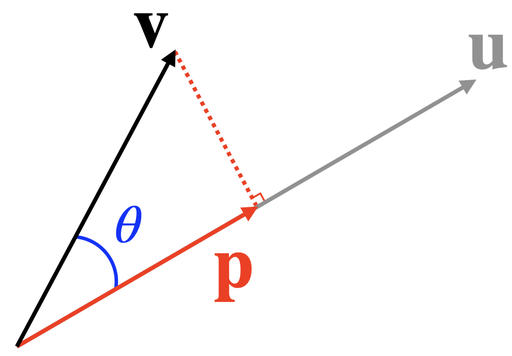

We first note that $\mathbf{v}$ and $\mathbf{p}$ form a right triangle, so that the length of $\mathbf{p}$ can be expressed in terms of the cosine of $\theta$. Recalling elementary trigonometry, the cosine of an angle is equal to the ratio of lengths of the side adjacent to that angle and the hypotenuse of the triangle:
$$
\cos\theta = \frac{\text{length of adjacent side}}{\text{length of hypotenuse}}
$$
In the diagram above, it is easy to see that these sides of the right triangle correspond to $\mathbf{p}$ and $\mathbf{v}$, respecitvely. The lengths of these sides can thus be calculated from the $L^2$ norms of these two vectors, giving us
$$
\cos\theta = \frac{\|\mathbf{p}\|_2}{\|\mathbf{v}\|_2}
$$

We next directly calculate the length of $\mathbf{p}$ using calculus. First, recall that $\mathbf{p}$ points in the same direction as $\mathbf{u}$, so can be expressed as a scalar multiple of $\mathbf{u}$:
$$
\mathbf{p} = a \mathbf{u}
$$
In particular, $\mathbf{p}$ is the scalar multiple of $\mathbf{u}$ that is closest to $\mathbf{v}$. We can thus calculate the value of $a$ as that which minimizes the distance of $a\mathbf{u}$ from $\mathbf{v}$:
$$
a = \underset{k}{\arg\min} \| k \mathbf{u} - \mathbf{v} \|_2 = \underset{k}{\arg\min} \| k \mathbf{u} - \mathbf{v} \|_2^2 = \underset{k}{\arg\min} \sum_i (k u_i - v_i)^2
$$
The derivative of the right-hand side with respect to $k$ is given by
$$
\frac{\text{d}}{\text{d}k} \sum_i (k u_i - v_i)^2 = 2 \sum_i (k u_i - v_i) u_i
$$
Plugging in $a$ and setting to 0, we then obtain
$$
a = \frac{\sum_i u_i v_i}{\sum_i u_i^2} = \frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\|_2^2}
$$
Thus, we have that the scalar projection has the following $L^2$ norm:
$$
\|\mathbf{p}\|_2 = \|a\mathbf{u}\|_2 = a\|\mathbf{u}\|_2 = \frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\|_2}
$$

Plugging this into our expression for the cosine of $\theta$, we have
$$
\cos\theta = \frac{\|\mathbf{p}\|_2}{\|\mathbf{v}\|_2} = \frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\|_2\|\mathbf{v}\|_2} \Leftrightarrow \mathbf{u} \cdot \mathbf{v} = \|\mathbf{u}\|_2\|\mathbf{v}\|_2 \cos\theta
$$
Note as well that the above expression for the cosine of $\theta$ in terms of $\|\mathbf{p}\|_2$ implies that $\|\mathbf{p}\|_2 = \|\mathbf{u}\|_2\cos\theta$. It therefore also holds that
$$
\mathbf{u} \cdot \mathbf{v}  = \|\mathbf{u}\|_2\|\mathbf{p}\|_2
$$
The dot product between $\mathbf{u}$ and $\mathbf{v}$ is thus equal to the product of the $L^2$ norms of $\mathbf{u}$ and of its scalar projection onto $\mathbf{v}$ (or, equivalently, vice versa). In other words, the dot product is proportional to the size of the shadow one vector casts onto another. This quantifies in some sense the extent to which they "overlap" -- note that neither will cast any shadow on the other if they point in orthogonal directions.

## Eigenvectors and eigenvalues

An **eigenvector** of a **square** matrix is one that, when transformed/multiplied by the matrix, only gets re-scaled:
$$ \mathbf{Av} = \lambda \mathbf{v} $$
The scaling factor $\lambda$ is called its associated **eigenvalue**.

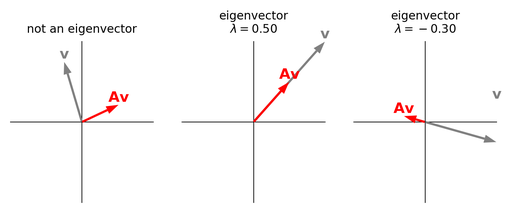

- An $M \times M$ matrix can have up to $M$ linearly independent eigenvectors
- Not obvious why they are useful, but as you begin to do more linear algebra you'll see they come up all the time!

Except for some of the special matrices already discussed (and others), most of the time the transformation a square matrix will perform on a vector can be pretty complicated. It can rotate different vectors in different directions and also make the bigger or smaller (e.g. see the example in the "Matrices as Transformations" slide).

But most matrices also have a small number of special vectors that actually don't get rotated at all by them, they only get rescaled. In other words, a vector $\mathbf{v}$ is an eigenvector of $\mathbf{A}$ if it satisfies the following equation:
$$ \mathbf{Av} = \lambda \mathbf{v} $$
These special vectors are called **eigenvectors**. The factor $\lambda$ by which an eigenvector is re-scaled is called its associated **eigenvalue**.

When you first begin to learn linear algebra, eigenvectors and eigenvalues seem like mysterious things. It is not at all obvious why they are important or worth knowing. But as you begin to do more and more linear algebra, you'll find that eigenvectors and eigenvalues mysteriously appear over and over again. Sometimes for reasons that can be understood, other times for entirely non-obvious reasons.

Calculating the eigenvectors of a matrix is somewhat complicated, and we won't cover it here.

## Matrix inverse

If we transform a vector $\mathbf{v} \rightarrow \mathbf{Av}$, can we then transform it back?

Yes -- use the **matrix inverse** of $\mathbf{A}$, notated by $\mathbf{A}^{-1}$:
$$ \mathbf{A}^{-1}\mathbf{Av} = \mathbf{v}$$

Note that $\mathbf{A}^{-1}\mathbf{A}$ is an identity transformation! So:
$$ \mathbf{A}^{-1} \mathbf{A} = \mathbf{I} $$

*Note:* not all matrices are invertible!
- E.g. matrix of 0's transforms all vectors to the same thing (a vector of 0's), so you can't recover $\mathbf{v}$ from $\mathbf{Av}$
- An $M \times M$ matrix is invertible only if all of its columns (or rows) are linearly independent

To get the original vector $\mathbf{v}$ back from the transformed vector $\mathbf{Av}$, we can invert this transformation via the **matrix inverse** $\mathbf{A}^{-1}$, which is the matrix that satisfies the equation
$$ \mathbf{A}^{-1}\mathbf{A} \mathbf{v} = \mathbf{v} $$
for any vector $\mathbf{v}$. As can be seen from this equation, $\mathbf{A}^{-1}\mathbf{A}$ is an identity map, and therefore satisfies
$$ \mathbf{A}^{-1} \mathbf{A} = \mathbf{I} $$
This is the conventional definition of the matrix inverse. Calculating the matrix is inverse is actually pretty hard, and we won't cover it here. Note that in this equation two matrices are being multiplied together, something we haven't yet covered but will do in the next few slides.

It turns out that not all matrices are actually invertible -- in other words, the transformations they produce cannot always be inverted. A simple example is a matrix of 0's, which transforms any vector to a vector of 0's. Because all vectors get transformed to the same thing, you can't recover them once they've been transformed! More generally, it turns out that any square matrix with linearly independent columns is invertible. If any one of its $M$ $M$-dimensional columns is not linearly independent of the rest, it is not invertible. Matrices that are not invertible are called **singular**.

A neat example of matrices that are invertible is orthonormal matrices. Because the columns of an orthonormal matrix are orthogonal to each other, they are linearly independent. Thus, orthonormal matrices are always full rank and therefore always invertible. In particular, orthonormal matrices have the special property that their inverses are equal to their transposes:
$$ \mathbf{A}^T\mathbf{A} = \mathbf{I} $$
Try proving this yourself at home! First, you need to learn how to multiply two matrices together, which we'll cover in the next few slides. Second, you need to use the facts that 
1. the dot product between two different columns of an orthonormal matrix is 0 because they are orthogonal to each other
2. the dot product of any column of an orthonormal matrix with itself is 1 because it has an $L^2$ norm of 1

## Matrix rank

The **rank** of a matrix is the number of its rows or columns that are linearly independent [Turns out these two numbers are the same!](https://en.wikipedia.org/wiki/Rank_(linear_algebra)#Proofs_that_column_rank_=_row_rank).

An $M \times N$ matrix is **full rank** if its rank is $\min\{M, N\}$ (the highest possible rank).

- The columns of a full rank fat matrix ($M < N$) form a complete basis
- The rows of a full rank skinny matrix ($M > N$) form a complete basis
- The rows and columns of a full rank square matrix ($M = N$) form a complete basis

A square matrix is invertible if and only if it is full rank

The matrix rank is a property of matrices that tells you about the linear independence of its rows and columns. Specifically, the matrix rank is the number of rows or columns that are linearly independent -- it turns out these two numbers are always the same! Check out [Wikipedia](https://en.wikipedia.org/wiki/Rank_(linear_algebra)#Proofs_that_column_rank_=_row_rank) for a simple proof of this surprising fact.

An $M \times N$ matrix can have up to $M$ linearly independent rows or $N$ linearly independent columns. A matrix is said to be **full rank** if as many rows/columns as can be linearly independent are.

The matrix rank is particularly useful for determining whether a matrix is invertible: a matrix is invertible if and only if it is full rank.

## Matrix-matrix multiplication as a sum of **outer products**

A product between an $M \times 1$ column vector $\mathbf{u}$ and a $1 \times P$ row vector $\mathbf{v}^T$ is called an **outer product**:
$$ \mathbf{u}\mathbf{v}^T = \begin{bmatrix} u_1v_1 & u_1v_2 & \ldots & u_1v_P \\ u_2v_1 & u_2v_2 & \ldots & u_2v_P \\ \vdots & \vdots & \ldots & \vdots \\ u_Mv_1 & u_Mv_2 & \ldots & u_Mv_P \end{bmatrix} $$

Matrix-matrix multiplication can be seen as a sum of such outer products
$$
\mathbf{AB} = \begin{bmatrix} | & | & \ldots & | \\ \mathbf{a}^{(1)} & \mathbf{a}^{(2)} & \ldots & \mathbf{a}^{(N)} \\ | & | & \ldots & | \end{bmatrix} \begin{bmatrix} - & {\mathbf{b}^{(1)}}^T & - \\ - & {\mathbf{b}^{(2)}}^T & - \\ \vdots & \vdots & \vdots \\ - & {\mathbf{b}^{(N)}}^T & - \end{bmatrix} \\
\phantom{\mathbf{AB}} = \mathbf{a}^{(1)}{\mathbf{b}^{(1)}}^T + \mathbf{a}^{(2)}{\mathbf{b}^{(2)}}^T + \ldots + \mathbf{a}^{(N)}{\mathbf{b}^{(N)}}^T
$$

One last way to think about matrix-matrix multiplication is in terms of outer products. A matrix-matrix product $\mathbf{AB}$ is equal to the sum of outer products between the columns of $\mathbf{A}$ and the rows of $\mathbf{B}$ (recall that $\mathbf{A}$ must have as many columns as $\mathbf{B}$ has rows for this product to exist).

### Outer products in `numpy`

Use the `outer()` function

In [ ]:
A = np.arange(8).reshape(2, 4)
B = np.arange(12).reshape(4, 3)

In [ ]:
AB = np.dot(A, B)   # matrix-matrix multiplication with np.dot()

m, n = A.shape
n, p = B.shape

AB_outer = np.zeros((m, p))

for i in range(n):
    AB_outer += np.outer(A[:, i], B[i, :])  # outer product

print('using dot:\n', AB)
print('using outer products:\n', AB_outer)

## Outer products and matrix rank: the **singular value decomposition**

Note that an outer product is a matrix with rank 1: each of its columns is just a scalar multiple of another!

$$ \mathbf{u}\mathbf{v}^T = \begin{bmatrix} u_1v_1 & u_1v_2 & \ldots & u_1v_P \\ u_2v_1 & u_2v_2 & \ldots & u_2v_P \\ \vdots & \vdots & \ldots & \vdots \\ u_Mv_1 & u_Mv_2 & \ldots & u_Mv_P \end{bmatrix} = \begin{bmatrix} v_1\mathbf{u} & v_2\mathbf{u} & \ldots & v_P \mathbf{u} \end{bmatrix}$$

An important fact about matrices is that any rank $N$ matrix $\mathbf{A}$ can be expressed as a sum of $N$ outer products between two sets of $N$ orthogonal vectors $\{\mathbf{u}^{(1)}, \ldots, \mathbf{u}^{(N)}\}$, $\{\mathbf{v}^{(1)}, \ldots, \mathbf{v}^{(N)}\}$:
$$
\mathbf{A} = \mathbf{u}^{(1)}{\mathbf{v}^{(1)}}^T + \mathbf{u}^{(2)}{\mathbf{v}^{(2)}}^T  + \ldots + \mathbf{u}^{(N)}{\mathbf{v}^{(N)}}^T
$$
This is called the **singular value decomposition**.

Note that an outer product is an operation that turns two vectors into a matrix, which is rank 1.

A cool fact of linear algebra is that any rank $N$ matrix can actually be written as a sum of $N$ rank 1 matrices. One way of decomposing a matrix in this way is called the **singular value decomposition**, in which the matrix can be expressed as a sum of rank 1 matrices, comprising outer products between two sets of orthonormal vectors,
$$
\mathbf{A} = s_1\mathbf{u}^{(1)}{\mathbf{v}^{(1)}}^T + s_2\mathbf{u}^{(2)}{\mathbf{v}^{(2)}}^T  + \ldots + s_N\mathbf{u}^{(N)}{\mathbf{v}^{(N)}}^T
$$
Here, the orthonormal vectors $\{\mathbf{u}^{(1)}, \ldots, \mathbf{u}^{(N)}\}$ are called the **left singular vectors** of $\mathbf{A}$, and the orthonormal vectors $\{\mathbf{v}^{(1)}, \ldots, \mathbf{v}^{(N)}\}$ are called its **right singular vectors**. The coefficients $s_1, s_2, \ldots, s_N$ are called the **singular values** of $\mathbf{A}$.

Recalling that any matrix-matrix product is equivalent to a sum of outer products, we can re-write this sum as a matrix-matrix product as follows:
$$
\mathbf{A} = 
\begin{bmatrix} | & | & \ldots & | \\ \mathbf{u}^{(1)} & \mathbf{u}^{(2)} & \ldots & \mathbf{u}^{(N)} \\ | & | & \ldots & | \end{bmatrix}
\begin{bmatrix} s_1 & 0 & \ldots & 0 \\ 0 & s_2 & \ldots & 0 \\ \vdots & \vdots & \ddots & 0 \\ 0 & 0 & \ldots & s_N \end{bmatrix}
\begin{bmatrix} - & {\mathbf{v}^{(1)}}^T & - \\ - & {\mathbf{v}^{(2)}}^T & - \\ \vdots & \vdots & \vdots \\ - & {\mathbf{v}^{(N)}}^T & - \end{bmatrix}
$$